# Computing Binomial Distributions to Estimate Likelihood Distribution for a 2-State problem

### Pratical demonstratoin of computation of prior, likelihood and posterior distribution in Bayesian statistics for the CNM coursework in SINP during Fall 2022 by Arunava Mukherjee (class 2, 29 August 2022)

#### 
 *  This program is free software; you can redistribute it and/or modify
 *  it under the terms of the GNU General Public License as published by
 *  the Free Software Foundation; either version 2 of the License, or
 *  (at your option) any later version.
 *
 *  This program is distributed in the hope that it will be useful,
 *  but WITHOUT ANY WARRANTY; without even the implied warranty of
 *  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 *  GNU General Public License for more details.
 *
 *  You should have received a copy of the GNU General Public License
 *  along with with program; see the file COPYING. If not, write to the
 *  Free Software Foundation, Inc., 59 Temple Place, Suite 330, Boston,
 *  MA  02111-1307  USA.

**(c) Arunava Mukherjee, 2022**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#### Define a function for factorial of a number 

In [2]:
def factorial(n):
    factr = 1
    for i in range(n):
        factr *= (i+1)
        
    return factr

In [3]:
n = 5
factorial(n)

120

#### Define functions for permutations and combinations 

In [4]:
def n_permn_r(n, r):
    nPr = factorial(n)/factorial(n - r)
    
    return nPr

def n_combn_r(n, r):
    nCr = factorial(n)/(factorial(r) * factorial(n - r))
    
    return nCr

In [5]:
n, r = 5, 2
n_combn_r(n, r)

10.0

### Define probability of binomial distribution

In [6]:
def P_BinomialDist(N, X, theta):
    prob = n_combn_r(N, X) * (theta**X) * ((1.0 - theta)**(N - X))
    
    return prob

#### Test it with a specific choice of `N`, `x` and parameter ($\theta$)

In [7]:
N, X = 5, 2

In [8]:
theta = (X/N)
P_BinomialDist(N, X, theta)

0.3456

In [9]:
# save it as the true value
theta_true = theta

### Define the set of all hypotheses ($H_i$)

In [10]:
num_pts = 101    # (change this!)
theta_arr = np.linspace(0.0, 1.0, num_pts)    # uniform prior distribution
print (theta_arr)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


### Define prior values for all the hypotheses ($P(\theta)$)

In [11]:
prior_arr = np.zeros_like(theta_arr) + (1.0/len(theta_arr))
print ('prior_arr :', prior_arr)

prior_arr : [0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.009

#### check the sum of all prior values

In [12]:
sum_prior = np.sum(prior_arr)
print ('sum of all the prior values =', sum_prior)

sum of all the prior values = 0.9999999999999999


#### plot the prior distribution

Text(0, 0.5, '$P(\\theta)$')

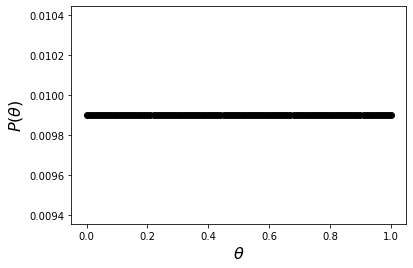

In [13]:
plt.plot(theta_arr, prior_arr, 'ko')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta)$', fontsize=16)

### Define likelihood for all the hypotheses ($P(D | \theta)$)

In [14]:
likelihood_arr = np.zeros_like(theta_arr)    # initialize
i = 0
for theta in theta_arr:
    likelihood_arr[i] = P_BinomialDist(N, X, theta)
    i += 1
    
print ('likelihood_arr:', likelihood_arr)

likelihood_arr: [0.00000000e+00 9.70299000e-04 3.76476800e-03 8.21405700e-03
 1.41557760e-02 2.14343750e-02 2.99010240e-02 3.94134930e-02
 4.98360320e-02 6.10392510e-02 7.29000000e-02 8.53012490e-02
 9.81319680e-02 1.11287007e-01 1.24666976e-01 1.38178125e-01
 1.51732224e-01 1.65246443e-01 1.78643232e-01 1.91850201e-01
 2.04800000e-01 2.17430199e-01 2.29683168e-01 2.41505957e-01
 2.52850176e-01 2.63671875e-01 2.73931424e-01 2.83593393e-01
 2.92626432e-01 3.01003151e-01 3.08700000e-01 3.15697149e-01
 3.21978368e-01 3.27530907e-01 3.32345376e-01 3.36415625e-01
 3.39738624e-01 3.42314343e-01 3.44145632e-01 3.45238101e-01
 3.45600000e-01 3.45242099e-01 3.44177568e-01 3.42421857e-01
 3.39992576e-01 3.36909375e-01 3.33193824e-01 3.28869293e-01
 3.23960832e-01 3.18495051e-01 3.12500000e-01 3.06005049e-01
 2.99040768e-01 2.91638807e-01 2.83831776e-01 2.75653125e-01
 2.67137024e-01 2.58318243e-01 2.49232032e-01 2.39914001e-01
 2.30400000e-01 2.20725999e-01 2.10927968e-01 2.01041757e-01
 1.91102

#### check the sum of all likelihood values

In [15]:
sum_likelihood = np.sum(likelihood_arr)
print ('sum of all the likelihood values =', sum_likelihood)

sum of all the likelihood values = 16.666666500000005


#### plot the likelihood distribution

Text(0, 0.5, '$P(D | \\theta)$')

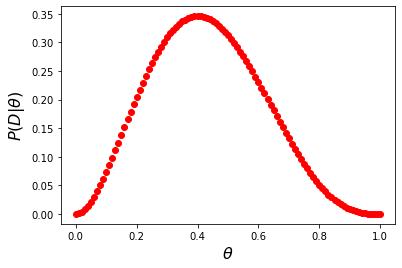

In [16]:
plt.plot(theta_arr, likelihood_arr, 'ro')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(D | \theta)$', fontsize=16)

In [17]:
sum_likelihood = np.sum(likelihood_arr)
print ('sum of all the likelihood values =', sum_likelihood)

sum of all the likelihood values = 16.666666500000005


### Define unnormalized posterior values ($h_i$) for all the hypotheses ($P(D | \theta)$)

In [18]:
h_arr = (prior_arr * likelihood_arr)
print ('Array of unnormalized posterior values (h_i) :', h_arr)

Array of unnormalized posterior values (h_i) : [0.00000000e+00 9.60692079e-06 3.72749307e-05 8.13272970e-05
 1.40156198e-04 2.12221535e-04 2.96049743e-04 3.90232604e-04
 4.93426059e-04 6.04349020e-04 7.21782178e-04 8.44566822e-04
 9.71603644e-04 1.10185155e-03 1.23432650e-03 1.36810025e-03
 1.50229925e-03 1.63610340e-03 1.76874487e-03 1.89950694e-03
 2.02772277e-03 2.15277425e-03 2.27409077e-03 2.39114809e-03
 2.50346709e-03 2.61061262e-03 2.71219232e-03 2.80785538e-03
 2.89729141e-03 2.98022922e-03 3.05643564e-03 3.12571435e-03
 3.18790463e-03 3.24288027e-03 3.29054828e-03 3.33084777e-03
 3.36374875e-03 3.38925092e-03 3.40738250e-03 3.41819902e-03
 3.42178218e-03 3.41823860e-03 3.40769869e-03 3.39031542e-03
 3.36626313e-03 3.33573639e-03 3.29894875e-03 3.25613161e-03
 3.20753299e-03 3.15341635e-03 3.09405941e-03 3.02975296e-03
 2.96079968e-03 2.88751294e-03 2.81021560e-03 2.72923886e-03
 2.64492103e-03 2.55760637e-03 2.46764388e-03 2.37538615e-03
 2.28118812e-03 2.18540593e-03 2.08839

#### check the sum of all unnormalized posterior ($h_i = h(\theta)$) values

In [19]:
sum_h = np.sum(h_arr)
print ('sum of all the unnormalized posterior values =', sum_h)

sum of all the unnormalized posterior values = 0.1650165


#### plot the unnormalized posterior ($h_i = h(\theta)$) distribution

Text(0, 0.5, '$h_i = h(\\theta)$')

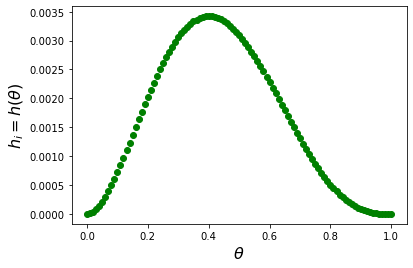

In [20]:
plt.plot(theta_arr, h_arr, 'go')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$h_i = h(\theta)$', fontsize=16)

### Define posterior values ($P(\theta | D)$) for all the hypotheses

In [21]:
posterior_arr = (h_arr/sum_h)
print ('array of posterior values :', posterior_arr)

array of posterior values : [0.00000000e+00 5.82179406e-05 2.25886082e-04 4.92843425e-04
 8.49346568e-04 1.28606251e-03 1.79406146e-03 2.36480960e-03
 2.99016195e-03 3.66235510e-03 4.37400004e-03 5.11807499e-03
 5.88791814e-03 6.67722049e-03 7.48001863e-03 8.29068758e-03
 9.10393353e-03 9.91478668e-03 1.07185940e-02 1.15110122e-02
 1.22880001e-02 1.30458121e-02 1.37809902e-02 1.44903576e-02
 1.51710107e-02 1.58203127e-02 1.64358856e-02 1.70156038e-02
 1.75575861e-02 1.80601892e-02 1.85220002e-02 1.89418291e-02
 1.93187023e-02 1.96518546e-02 1.99407228e-02 2.01849377e-02
 2.03843176e-02 2.05388608e-02 2.06487381e-02 2.07142863e-02
 2.07360002e-02 2.07145261e-02 2.06506543e-02 2.05453116e-02
 2.03995548e-02 2.02145627e-02 1.99916296e-02 1.97321578e-02
 1.94376501e-02 1.91097033e-02 1.87500002e-02 1.83603031e-02
 1.79424463e-02 1.74983286e-02 1.70299067e-02 1.65391877e-02
 1.60282216e-02 1.54990947e-02 1.49539221e-02 1.43948402e-02
 1.38240001e-02 1.32435601e-02 1.26556782e-02 1.20625055e

#### check the sum of all posterior values ($P(\theta | D)$) for all the hypotheses

In [22]:
sum_posterior = np.sum(posterior_arr)
print ('sum of all the posterior values =', sum_posterior)

sum of all the posterior values = 1.0


#### plot the posterior ($P(\theta | D)$) distribution

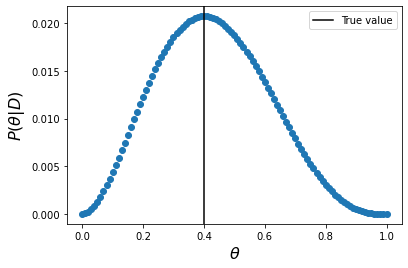

In [23]:
plt.plot(theta_arr, posterior_arr, 'o')
plt.axvline(x = theta_true, color='k', label='True value')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta | D)$', fontsize=16)
plt.legend()

### Check the data used for this problem: 
#### `N` : Number of trials, `X` : number of correct outcomes

In [24]:
print ('Number of trials (N) = %d, and number of correct outcomes (X) = %d .'%(N, X))

Number of trials (N) = 5, and number of correct outcomes (X) = 2 .
